# Settings

In [1]:
import numpy as np
import librosa as lr
import matplotlib.pyplot as plt
import soundfile as sf
import sys
sys.path.append("C:/Users/HouseW/LocalPython/SATEST-main/SATEST-main/utils.py")
from utils import FrameExtractor, LPC, ref_derbin, derbin, auto_corr, PlotLPCSpectrum, ThresholdClipper

# plt.rcParams["figure.figsize"] = (5,5)
# plt.rc('font', size=20)
# plt.rc('axes', labelsize=25)
# plt.rc('xtick', labelsize=25)
# plt.rc('ytick',labelsize=25)
# plt.rc('legend', fontsize=20)
# plt.rc('figure', titlesize=50)
# plt.rc('figure', autolayout=True)

sr = 16000
win_time = 0.02
dftlen = 512
# Window Sample의 길이 표현
win_len = int(win_time * sr)
hop_len = int(win_len * 0.5)
print("Window Len:",win_len)
print("Hop Len:",hop_len)

file_path = 'sa0_new.wav'
yr,ori_sr = lr.load(file_path,sr=sr)
time = np.linspace(0,len(yr),len(yr),endpoint=False)/sr




Window Len: 320
Hop Len: 160


## Windowing and Overlapping

In [2]:
# ## Overlap Test

# h = lr.filters.get_window(window="hann", Nx=50)
# z = np.zeros_like(h)
# h = np.concatenate([h,z])
# h2 = np.roll(h,25)
# plt.plot(h)
# plt.plot(h2)
# plt.show()

# # h3 = h+h2+np.roll(h2,25)
# h3 = h+h2
# # print(h3)
# plt.plot(h3)
# plt.show()

# ### OLA를 하려면 hamming은 1.08배 scale이 되어야 하는구나!

In [3]:
# ###
# ### Read input waves
# # file_path = "yonseicrop.wav"
# file_path = 'sa0_new.wav'

# ### Read Audio Files
# yr,ori_sr = lr.load(file_path,sr=sr)
# # print(f"Loaded: {file_path}, Shape: {np.array(yr).shape}, Original sr: {ori_sr}")

# # Time axis
# time = np.linspace(0,len(yr),len(yr),endpoint=False)/sr
# plt.plot(time,yr)
# plt.xlim(0,time[-1])
# plt.show()

In [4]:
# ### Frame Extractor
# ### Extract frames by windowing
# ## 겹치는 Frame을 overlap 해도 원신호에 영향이 가지 않는다

# FE = utils.FrameExtractor(yr,win_len,hop_len)
# frame_arr = FE.extract_frames(win_type="hann")

# # plt.plot(frame_arr[0])
# # plt.plot(frame_arr[1])
# # plt.show()

# x = np.concatenate([frame_arr[0],np.zeros_like(frame_arr[0])])
# y = np.concatenate([frame_arr[1],np.zeros_like(frame_arr[1])])
# y = np.roll(y,hop_len)
# z = x+y / 1.08

# plt.plot(z)
# # plt.show()
# # plt.plot(yr[:win_len*2],'--')
# plt.title("Reconstructed and Original")
# plt.show()

# Frame Visualization In Total

In [5]:
# ## 0번 frame 부터 5개를 표시해보자
# """ Frame Visualization Between Total """

# ind1 = 0
# ind2 = 30
# fig, axes = plt.subplots(5,1,figsize=(15,20))

# time = np.arange(0, len(yr)/sr, 1/sr)
# for i in range(5):
#     startind1 = FE.hop_len * ind1
#     endind1 = FE.hop_len * ind1 + FE.win_len
#     startind2 = FE.hop_len * ind2
#     endind2 = FE.hop_len * ind2 + FE.win_len
#     print("startind:", startind1)
#     frame1 = frame_arr[ind1]
#     frame2 = frame_arr[ind2]
#     ind1 += 1
#     ind2 += 1

#     # 기존 waveform 그리기
#     axes[i].plot(time, yr, label='waveform')
    
#     # 추출된 frame 그리기
#     axes[i].plot(time[startind1: endind1], frame1, label='frame {}'.format(2*i + 1), linestyle='--')
#     axes[i].plot(time[startind2: endind2], frame2, label='frame {}'.format(2*i + 2), linestyle='--')
    
#     # axes[i].set_xlabel('Time(s)', fontsize=18, fontweight='bold')
#     axes[i].set_ylabel('Amplitude', fontsize=14, fontweight='bold')
#     axes[i].set_title('Frame index: {},{}'.format(ind1, ind2), fontsize=16, fontweight='bold')
#     axes[i].tick_params(axis='both', labelsize=20)
#     axes[i].set_xlim(0, time[-1])

#     # axes[i].legend(fontsize=20,loc='lower left')
#     axes[i].grid()
    
#     # plt.figure(figsize=[15,6])
#     # plt.subplot(2,2,1)
#     # plt.plot(frame1)
#     # plt.grid()
#     # plt.xlim(0,len(frame1)-1)
#     # plt.title("Unvoiced")
#     # plt.xlabel("Samples")
#     # plt.subplot(2,2,2)
#     # plt.plot(frame2)
#     # plt.grid()
#     # plt.xlim(0,len(frame2)-1)
#     # plt.title("voiced")
#     # plt.xlabel("Samples")

# # plt.tight_layout()  # subplot 간의 간격 조절
# plt.show()


In [6]:
### librosa의 LPC와 비교하는 것
### LPC 계수가 올바르게 추출 되었는지 디버깅
import librosa
import matplotlib.pyplot as plt
import scipy
from utils import FrameExtractor, LPC, ref_derbin, derbin, auto_corr

FE = FrameExtractor(yr,win_len=win_len,hop_len=hop_len)
frame_arr = FE.extract_frames(win_type="rectangular")
y = frame_arr[30]

a = librosa.lpc(y, order=3)
print(a)
mya = LPC(y, order=3)
drbina,e1 = ref_derbin(auto_corr(y),order=3)
mydrbina,e2 = derbin(auto_corr(y), p=3)

print("librosa LPC: \t\t", -1*a[1:])
print("Matrix Inverse: \t", mya)
print("Derbin's Inverse: \t", drbina)
print("myDerbin's Inverse: \t", mydrbina)

rectangular
From 8200 samples, total 50 frames are generated
[ 1.0000000e+00 -1.8354051e+00  9.0559781e-01 -6.7733682e-04]
librosa LPC: 		 [ 1.8354051e+00 -9.0559781e-01  6.7733682e-04]
Matrix Inverse: 	 [ 1.5108497  -0.37836478 -0.22113916]
Derbin's Inverse: 	 [ 1.5108497  -0.37836478 -0.22113916]
myDerbin's Inverse: 	 [ 1.5108497  -0.37836478 -0.22113916]


adj: 0.05


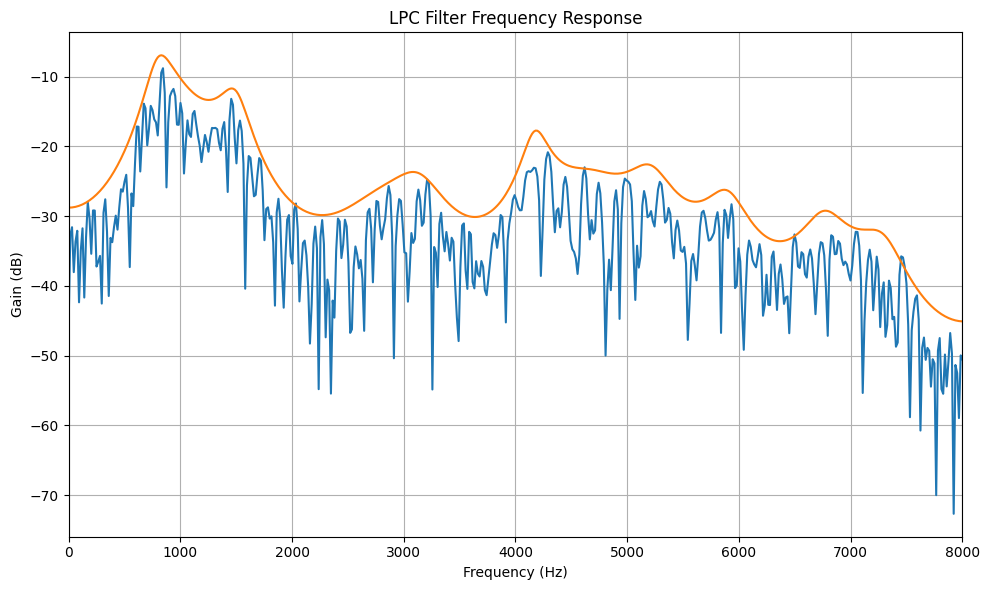

In [7]:
## Filter의 Vocal Tract Response 추정해보기

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, hamming, lfilter_zi, lfiltic
# from scipy.linalg import toeplitz, inv

signal = frame_arr[15]
# t = np.linspace(0, 1, sr)
# signal = np.sin(2 * np.pi * 440 * t) + 0.5 * np.sin(2 * np.pi * 880 * t)
"""
# 예제 신호 생성 (예: 사인파)
fs = 8000  # 샘플링 주파수
dftlen = 1024
t = np.linspace(0, 1, fs)
# signal = np.sin(2 * np.pi * 440 * t) + 0.5 * np.sin(2 * np.pi * 880 * t)


# LPC 분석
order = 12
a = LPC(signal, order=12)
a = np.concatenate(([1],-a))
print(a)
w, h = freqz(b=[1], a=a)

sr = 16000
# w축을 0-0.5Fs 로 정규화
w = w /np.pi * 0.5 * sr
ff = np.fft.rfft(signal,1024)[:-1]

# 주파수 응답 시각화
plt.figure(figsize=(10, 6))
plt.plot(w, 20 * np.log10(abs(h)), label='Frequency Response')
plt.title('Frequency Response of LPC Filter')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Amplitude [dB]')
plt.grid(True)
plt.legend()
# plt.show()

plt.plot(w,20 * np.log10(abs(ff)))
plt.title("FFT of window")
# plt.ylim(-50, 35)
plt.show()

print(len(ff))
# print(len(w))
"""

PlotLPCSpectrum(signal,sr=sr,p=25,dftlen=1024)


## Plot Error Signal

[ 1.         -1.44904991  0.31018357  0.00770638  0.33947888 -0.1389725
  0.04420563  0.04060078 -0.0833641  -0.0155531  -0.01050813]


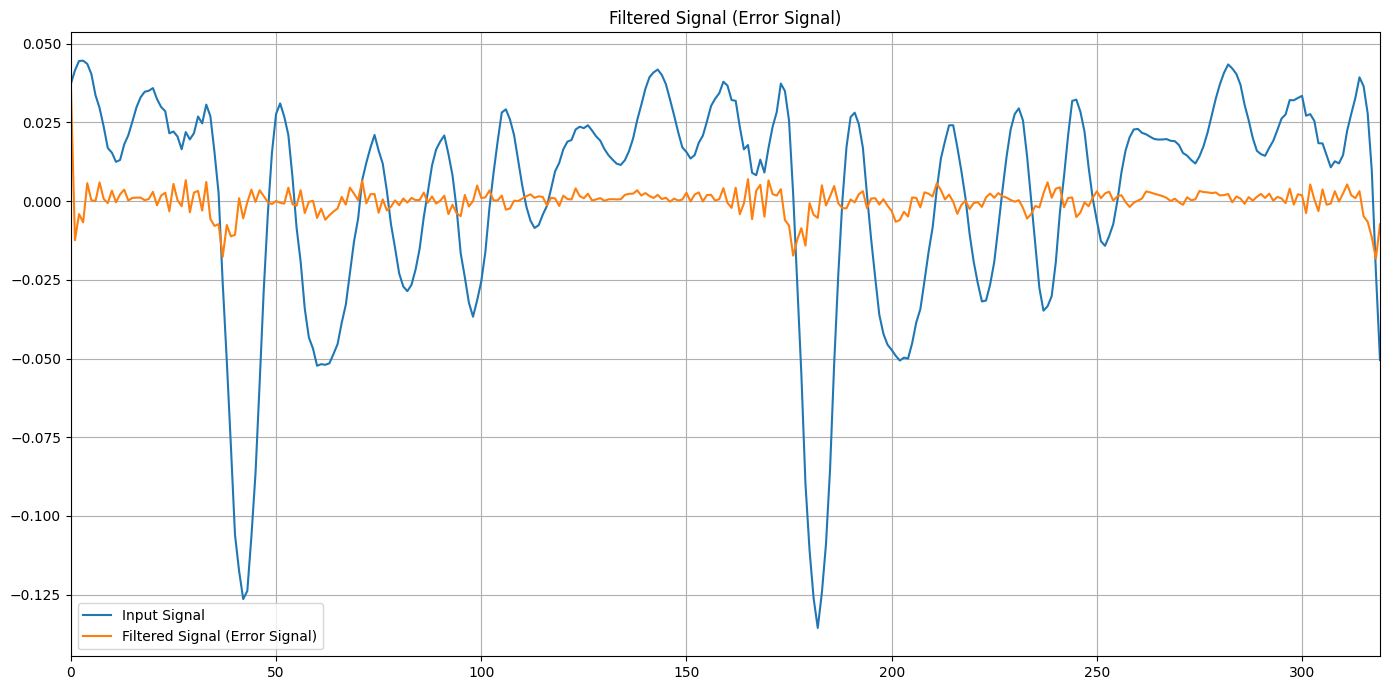

In [8]:
## 주어진 input 신호와, 에러 신호를 그려봅시다
## Error 신호 그리기

signal = frame_arr[30]
order = 10

# LPC Analysis
coeff = LPC(signal, order=10)

# Error 전달함수의 계수
coeff_T = np.concatenate(([1],-coeff))
# tt = lr.lpc(signal,order=order)
# print(tt)
print(coeff_T)

filtered = lfilter(coeff_T,[1],signal)

# 입력 신호와 에러 신호(필터링된 신호) 그리기
plt.figure(figsize=(14, 7))

# 입력 신호 플롯
# plt.subplot(2, 1, 1)
plt.plot(signal, label='Input Signal')
plt.title('Input Signal')
plt.grid(True)
plt.xlim(0,len(signal)-1)
plt.legend()

# 에러 신호(필터링된 신호) 플롯
# plt.subplot(2, 1, 2)
plt.plot(filtered, label='Filtered Signal (Error Signal)')
plt.title('Filtered Signal (Error Signal)')
plt.grid(True)
plt.legend()
plt.xlim(0,len(signal)-1)
plt.tight_layout()
plt.show()


# 음성 합성


In [9]:
# ## 각 frame에서 해야할 일

# """
# LPC 계수 측정하기
# Pitch 측정하기 - voiced
# Unvoiced 판단하기
# """

# signal = frame_arr[30]
# # plt.plot(signal)
# # plt.show()
# ### Frame에서 진행하는 Pitch Detection

# ## 900Hz Lowpass Filering
# cutoff_freq = 900.0
# sr = 16000
# nyquist = 0.5 * sr
# num_taps = 101 # 필터의 길이

# #FIR LPF
# lpf_coeff = scipy.signal.firwin(num_taps, cutoff=cutoff_freq, fs=sr, pass_zero='lowpass', window="hamming")
# yr_lpf = scipy.signal.lfilter(lpf_coeff, 1.0, signal)

# plt.plot(yr_lpf)
# plt.show()

# ###################### 주파수 스펙트럼 plot
# filtered_signal = lfilter(lpf_coeff, 1.0, signal)

# # 주파수 스펙트럼 계산
# fft_original = np.fft.fft(signal)
# fft_filtered = np.fft.fft(filtered_signal)
# freq = np.fft.fftfreq(len(signal), 1/sr)

# # 주파수 스펙트럼 시각화
# plt.figure(figsize=(12, 6))
# plt.plot(freq, np.abs(fft_original), label='Original Signal')
# plt.plot(freq, np.abs(fft_filtered), label='Filtered Signal', linestyle='--')
# plt.title('Frequency Spectrum')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.xlim(0, sr/2)  # Nyquist 주파수까지 표시
# plt.legend()
# plt.grid(True)
# plt.show()

# plt.plot(signal)
# plt.plot(filtered_signal)
# plt.show()

In [ ]:

# """
# 각 Frame의 AutoCorrelation 뜯어보는 코드
# Pitch Detection을 더 잘하기 위함
# """
# cutoff_freq = 900.0
# sr = 16000
# order = 10
# for signal in frame_arr[15:20]:
    
#     # signal = frame_arr[30]
#     ### Frame에서 진행하는 Pitch Detection

#     ## 900Hz Lowpass Filering
#     #FIR LPF
#     lpf_coeff = scipy.signal.firwin(numtaps=101, cutoff=cutoff_freq, fs=sr, pass_zero='lowpass', window="hamming")
#     signal_lpf = scipy.signal.lfilter(lpf_coeff, 1.0, signal)

#     # plt.plot(signal_lpf)
#     # plt.show()

#     ## Frame 에서 LPC 계수 계산하기
#     coeff = LPC(signal_lpf, order=order)
#     print(coeff)

#     ## Clipping 적용하기
#     Clipper = ThresholdClipper(signal_lpf)
#     signal_clipped = Clipper.center_clip(Clipper.CL)

#     # AC 계산하기
#     ac_arr = auto_corr(signal_clipped)

#     # Enery
#     energy = ac_arr[0]
#     voice_thres = energy * 0.4

#     # Find Peaks of AC 
#     peakval = np.max(ac_arr)    
#     maxima_indices, _ = scipy.signal.find_peaks(ac_arr)
#     maxima_indices = maxima_indices[maxima_indices>50]
    
#     if maxima_indices.size > 0:
#         maxval = np.max([ac_arr[i] for i in maxima_indices])
#         idx = np.argmax([ac_arr[i] for i in maxima_indices])
#         max_idx = maxima_indices[idx]
#     else:   
#         maxval = 0
#     flag = 1 if maxval > voice_thres else 0
#     pitch_freq = sr / max_idx if flag else 0
    
#     print(pitch_freq)
#     plt.plot(ac_arr)
#     plt.show()

## Def
## Pitch Detector

In [11]:
# Pitch Detector 함수 만들기
# voiced_flag : 1 if voiced, else 0
# pitch : pitch frequency if voiced, else 0
    
def PitchDetector(signal, sr=16000):
    ## Clipping 적용하기
    Clipper = ThresholdClipper(signal)
    signal_clipped = Clipper.center_clip(Clipper.CL)

    # AC 계산하기
    ac_arr = auto_corr(signal_clipped)

    # plt.plot(ac_arr)
    # plt.show()

    # Enery
    energy = ac_arr[0]
    voice_thres = energy * 0.35

    # Find Peaks of AC 
    peakval = np.max(ac_arr)    
    maxima_indices, _ = scipy.signal.find_peaks(ac_arr)
    maxima_indices = maxima_indices[maxima_indices>50]
    
    # print(maxima_indices)
    if maxima_indices.size > 0:
        maxval = np.max([ac_arr[i] for i in maxima_indices])
        idx = np.argmax([ac_arr[i] for i in maxima_indices])
        max_idx = maxima_indices[idx]
        # print(maxval, voice_thres)
        voiced_flag = 1 if maxval > voice_thres else 0
        pitch = sr / max_idx if voiced_flag else 0
        
    else:
        voiced_flag = 0
        pitch = 0

    return voiced_flag, pitch

rectangular
From 18000 samples, total 111 frames are generated
hamming
From 18000 samples, total 111 frames are generated


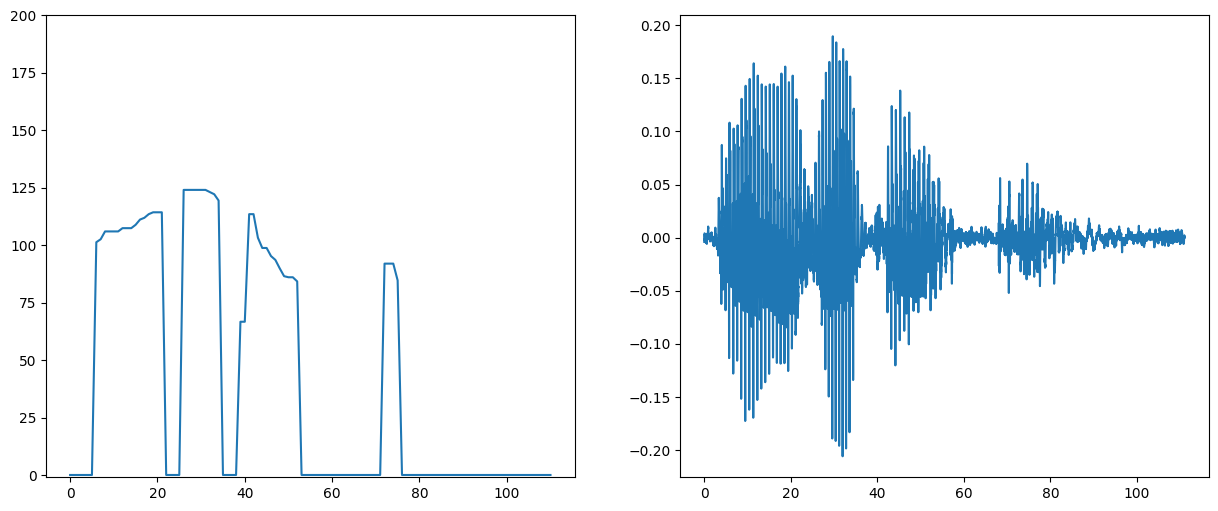

In [12]:

## 각 frame에서 해야할 일

"""
LPC 계수 측정하기
Pitch 측정하기 - voiced
Unvoiced 판단하기
"""
cutoff_freq = 900.0
sr = 16000
order = 10

file_path = "yonseicrop.wav"
yr,_ = lr.load(file_path,sr=sr)

## LPF to yr
lpf_coeff = scipy.signal.firwin(numtaps=101, cutoff=cutoff_freq, fs=sr, pass_zero='lowpass', window="hamming")
yr_lpf = scipy.signal.lfilter(lpf_coeff, 1.0, yr)

FE = FrameExtractor(yr_lpf,win_len,hop_len)
# Pitch Detection 에서는 rectangular를 써야할 듯
frame_arr = FE.extract_frames(win_type="rectangular")
ham_arr = FE.extract_frames(win_type="hamming")

i=0
pitchlist = []
## 20번 frame을 예로 들어봅시다
for i, signal in enumerate(frame_arr[:]):   
    # signal = frame_arr[30]
    ### Frame에서 진행하는 Pitch Detection

    # plt.plot(signal)
    # plt.show()
    # if i==5:
    #     break
    # i+=1
    
    ## Frame 에서 LPC 계수 계산하기
    coeff = LPC(signal, order=order)

    voiced_flag, pitch = PitchDetector(signal, sr)
    # if pitch: 
    #     print(i, "pitch: {}".format(pitch))
    pitchlist.append(pitch)
    
    ## 20번 frame의 신호를 정확하게 reconstruct 해볼까요?

# meidanfiltering to pitchlist
pitchlist = scipy.signal.medfilt(pitchlist, kernel_size=5)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(pitchlist)
plt.ylim(-1,200)
# plt.show()

# plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
plt.plot(np.linspace(0,len(frame_arr),len(yr)), yr)
plt.show()


# LPC Synthesis


adj: 0.05


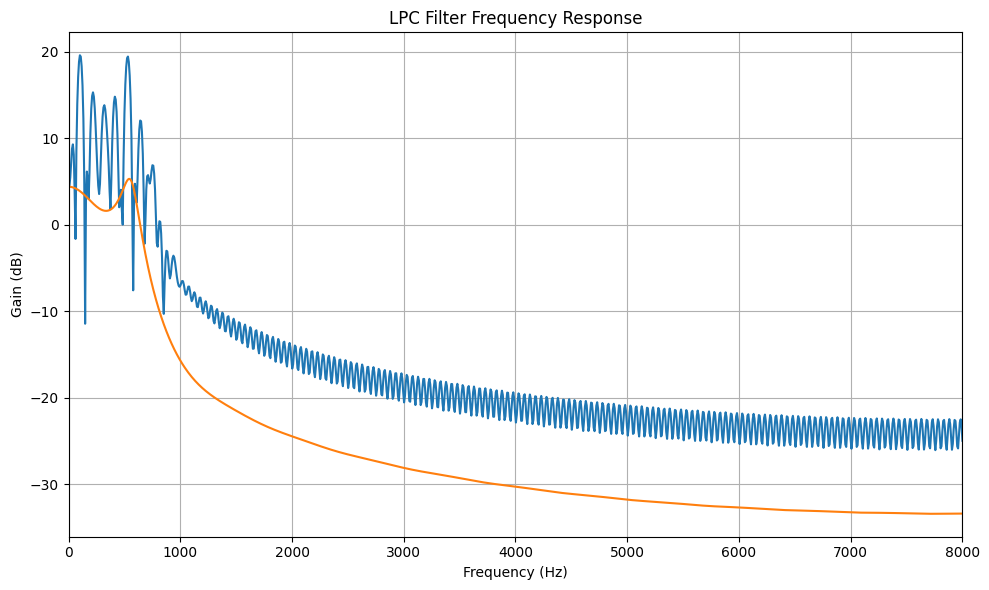

In [13]:
# Plot LPC
signal = frame_arr[10]
PlotLPCSpectrum(signal, sr=sr, p=25)

# SYNTHESIZE

## Definition
## LPF and Synthesis

In [71]:
"""
Definition of Frame Synthesis
"""

def LowPassFilter(signal, cutoff=900):
    lpf_coeff = scipy.signal.firwin(numtaps=101, cutoff=900.0, fs=sr, pass_zero='lowpass', window="hamming")
    filtered = scipy.signal.lfilter(lpf_coeff, 1.0, signal)
    
    return filtered


## input 으로 frame을 받아, 해당 frame을 반환해보자
def Synthesis(signal, sr, p=10, plotopt = False, n=10):
    #######################################################
    window = lr.filters.get_window("hann",Nx=len(signal))
    rectsignal = signal
    signal = signal * window
    
    coeff = LPC(signal, order=p)
    lpc_coeff = np.concatenate(([1],-coeff))
    
    # LPF
    rectsignal = LowPassFilter(rectsignal, cutoff=900.0)
    
    # Pitch Detection
    voiced_flag, pitch = PitchDetector(rectsignal, sr)
    # print("signal is {}".format(voiced_flag))
    
    if voiced_flag: 
        # print("pitch: {:.2f}Hz".format(pitch))
        
        duration = 0.008  # impulse 간격(초), 예시로 8ms
        samples_per_impulse = int(sr / pitch)
        
        # Impulse Train 초기화, 길이를 window_length로 설정
        impulse_train = np.zeros(len(signal))

        # 각 펄스 위치에 1 설정
        # n = n
        for i in range(0, len(signal), samples_per_impulse):
            if i+n < len(signal):
                impulse_train[i+n] = 1

        # plt.plot(impulse_train)
        # plt.show()

        # LPC 필터를 사용한 신호 합성
        synthesized_signal = scipy.signal.lfilter([1.0], lpc_coeff, impulse_train)        

    else : # Unvoiced
        sig_std = np.std(signal)
        excitation = np.random.normal(loc=0.0, scale = sig_std, size = signal.shape)
        
        F_excitation = np.fft.fft(excitation, len(signal))
        w, h = scipy.signal.freqz([1],lpc_coeff,worN=len(signal),whole=True, fs=sr)
        F_result = F_excitation*h
        synthesized_signal = np.fft.ifft(F_result, len(signal))
        synthesized_signal = np.real(synthesized_signal)
        
    # synthesized_signal = scipy.signal.lfilter([1],lpc_coeff,F_excitation)
    
    # print("sythn length:{}".format(len(synthesized_signal)))
    
    if plotopt:
        plt.figure(figsize=(15,3))
        plt.subplot(1,2,1)
        plt.plot(synthesized_signal)
        plt.title("Synthesized Signal with LPC")

        # print(coeff)
        # filtered = lfilter(coeff,[1],signal)
        plt.subplot(1,2,2)
        plt.plot(signal)
        plt.title("Frame")
        plt.show()
        
    return synthesized_signal

    # 결과 확인
    PlotLPCSpectrum(signal, sr=sr, p=order)


rectangular
From 18000 samples, total 111 frames are generated


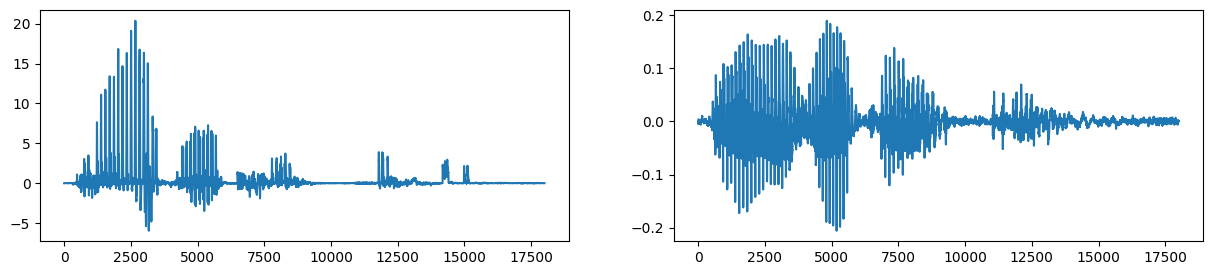

In [70]:
def LPCSynthesis(signal, win_len, hop_len, order, sr, plotopt, n=50):

    FE = FrameExtractor(y,win_len,hop_len)
    frame_arr = FE.extract_frames(win_type="rectangular")
    synthesized = np.zeros_like(y)

    for i, signal in enumerate(frame_arr[:]):
        tempsig = np.zeros_like(y)
        # print("num: {}".format(i))
        start = i * hop_len
        end = start + win_len
        tempsig[start:end]=Synthesis(signal, sr=sr,p=order, plotopt=plotopt, n = n)
        synthesized = synthesized + tempsig

    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    plt.plot(synthesized)
    plt.subplot(1,2,2)
    plt.plot(y)
    plt.show()

    return synthesized

## SYNTHESIZE
file_path = "sa0_new.wav"
file_path = "yonseicrop.wav"
y,__ = lr.load(file_path,sr=sr)

synthesized = LPCSynthesis(y,win_len=win_len,hop_len=hop_len, order=25, sr=sr, plotopt=False, n=100)
import IPython.display as ipd
ipd.Audio(synthesized, rate=sr,autoplay=True)
save_path = "synthesized1.wav"
# print(save_path)
sf.write(save_path, synthesized, sr)

In [16]:
# Load Data
import IPython.display as ipd
ipd.Audio(yr, rate=sr, autoplay=True)

# save_path = "synthesized.wav"
# # print(save_path)
# sf.write(save_path, synthesized, sr)